In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

In [7]:
# Load your data
data = pd.read_csv('feature_space.csv')
idle_time = data['idle time %'].values
avg_speed = data['avg speed'].values
avg_long_acceleration = data['avg long. acceleration'].values

In [8]:
kmeans = KMeans(n_clusters=3)
data_for_clustering = np.column_stack((idle_time, avg_speed, avg_long_acceleration))
kmeans_labels = kmeans.fit_predict(data_for_clustering)

c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


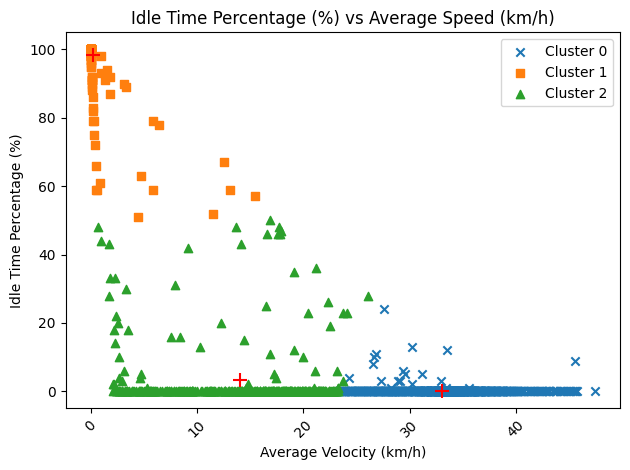

In [9]:
markers = ['x', 's', '^']

for cluster_label in set(kmeans_labels):
    cluster_data = [(avg_speed[i], idle_time[i]) for i, label in enumerate(kmeans_labels) if label == cluster_label]
    cluster_avg_speed, cluster_idle_time = zip(*cluster_data)
    plt.scatter(cluster_avg_speed, cluster_idle_time, label=f'Cluster {cluster_label}', marker=markers[cluster_label])

# Cluster centers
cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    plt.scatter(center[1], center[0], c='red', s=100, marker='+')

plt.xlabel('Average Velocity (km/h)')
plt.ylabel('Idle Time Percentage (%)')
plt.title('Idle Time Percentage (%) vs Average Speed (km/h)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
cluster_counts = np.bincount(kmeans_labels)

for cluster_idx, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_idx} has {count} points.")

Cluster 0 has 1115 points.
Cluster 1 has 498 points.
Cluster 2 has 378 points.


In [12]:
for cluster in range(3):
    target_cluster = cluster

    target_cluster_points = data_for_clustering[kmeans_labels == target_cluster]

    cluster_center = kmeans.cluster_centers_[target_cluster]
    distances_to_center = np.linalg.norm(target_cluster_points - cluster_center, axis=1)

    no_of_closest_points = [504, 225, 171] 
    indices_closest_to_center = np.argsort(distances_to_center)[:no_of_closest_points[cluster]]

    closest_points_to_center = target_cluster_points[indices_closest_to_center]

    closest_points_df = pd.DataFrame(data=closest_points_to_center, columns=['idle time %', 'avg speed', 'avg long. acceleration'])

    closest_points_df.to_csv(f'closest_points/cluster_{cluster}_closest_points.csv', index=False)

    print("Closest points to the cluster center for cluster", target_cluster, ":")
    print(closest_points_df)

Closest points to the cluster center for cluster 0 :
     idle time %  avg speed  avg long. acceleration
0            0.0    33.0679                 -0.0082
1            0.0    33.0805                  0.0221
2            0.0    33.0673                 -0.0196
3            0.0    33.0888                 -0.0160
4            0.0    33.0882                  0.0251
..           ...        ...                     ...
499          0.0    30.9445                 -0.0834
500          0.0    35.2222                 -0.0006
501          0.0    35.2239                  0.0135
502          0.0    35.2251                 -0.0157
503          0.0    30.9144                 -0.0501

[504 rows x 3 columns]
Closest points to the cluster center for cluster 1 :
     idle time %  avg speed  avg long. acceleration
0           98.0     0.0231                  0.0086
1           98.0     0.0220                 -0.0021
2           98.0     0.0215                  0.0049
3           98.0     0.0219           